<a href="https://colab.research.google.com/github/XiadaniCue/Simulaci-n-1/blob/main/M%C3%A9todo_de_Aceptaci%C3%B3n_y_Rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Método de Aceptación y Rechazo**
*Teorema Fundamemntal de Simulación*

Simular $X\sim f(x)$ es aquivalente a simular $(X,U)\sim U(x,U):0<U< f(x)$

Entonces es equivalente a reescribir f(x) como:
$$f(x)=\int_{0}^{f(x)} f(u) du$$
Queremos generar $x\sim f(x)$.

Suponga que sabemos generar $g(x)$ y sabemos que:
$$\frac{f(y)}{c f(g)}≤ c $$ para todo y



Nuestro pseudocódigo


1.   Generammos $Y$ con densidad $g$.
2.   Generar un número aleatorio $U\sim U(0,1)$
3.   Si $U ≤ \frac{f(y)}{g(y)}$, hacer $X=Y$. En caso contrario, regresar al paso 1



Generar una muestra de la variable con distribución:
$$f(x)=20x(1-x)^3$$

Para $0<x<1$

Usamos a $g(x)=1$

Nota que:
$$\frac{f(x)}{g(x)} = 20x(1-x)^3$$

Calculamos el valor de C que será el máximo

Con el criterio de la 1ra derivada
$$c=\frac{135}{64}$$

In [15]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def beta(x):
  return 20*x*((1-x)**3)

In [17]:
def eva(n):
  lista=[]
  c=135/64
  gx=1
  for i in range(n):
    x=rnd.random()
    u=rnd.random()
    m=beta(x)
    #print(u)
    prueba=m/(c*gx)
    if u<=prueba:
      lista.append(x)
  return lista

In [18]:
eva(5)

[0.07737230509071313]

In [19]:
B=eva(1000000)

In [20]:
#Calculamos la media
mu=np.mean(B)
print(mu)

0.3335596532926868


In [21]:
#calculamos la varianza
sigma2=np.var(B)
print(sigma2)

0.03174787327649397


Text(0.5, 1.0, 'Función de Densidad')

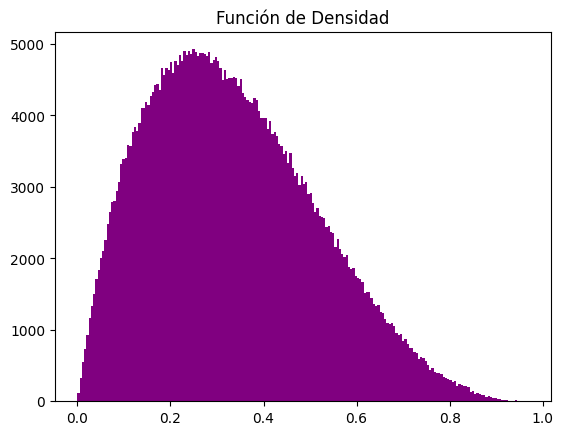

In [22]:
#El histograma nos ordena nuestros números por categorías
plt.hist(B,bins=200, color="purple")
plt.title("Función de Densidad")

In [23]:
#Hacemos nuestra gráfica acumulativa

def cdf(m):
  n=len(m)
  x=np.sort(m)
  y=np.arange(0,n)/n

  return x,y

In [24]:
X,Y=cdf(B)

Text(0.5, 1.0, 'Función Acumulativa')

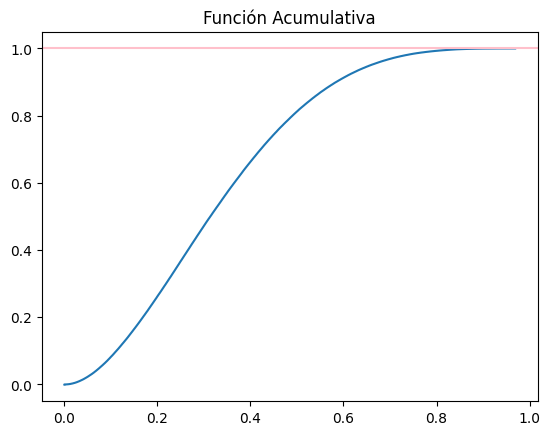

In [25]:
plt.step(X,Y)
plt.axhline(1, color="pink")
plt.title ("Función Acumulativa")

In [26]:
#También podemos reescribirlo como:
def eva2(n):
  lista1=[]
  c=135/64
  gx=1
  while len(lista1)<n:
    x=rnd.random()
    u=rnd.random()
    m=beta(x)
    #Comprobamos si la muestra debe ser aceptada
    if u<=m/(x*gx):
      lista1.append(x)
  return lista1



In [27]:
b=eva2(1000000)

Text(0.5, 1.0, 'Función de Densidad')

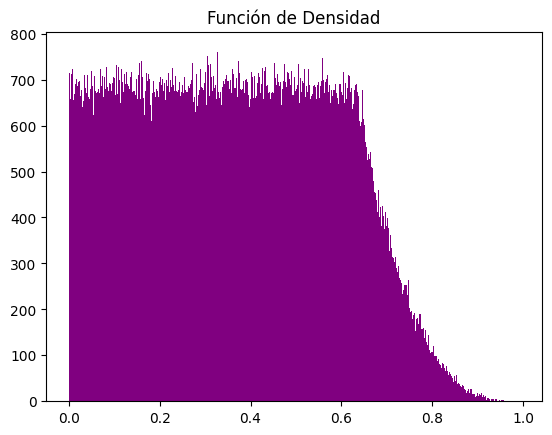

In [28]:
#El histograma nos ordena nuestros números por categorías
plt.hist(b,bins=2000, color="purple")
plt.title("Función de Densidad")